In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt

In [2]:
inbound_df = pd.read_csv("../Data/Inbound.csv")
inventory_df = pd.read_csv("../Data/Inventory.csv")
material_master_df = pd.read_csv("../Data/MaterialMaster.csv")
outbound_df = pd.read_csv("../Data/Outbound.csv")
operations_df = pd.read_csv("../Data/OperationCost.csv")

In [3]:
inventory_df = inventory_df.dropna()
outbound_df = outbound_df.dropna()

avg_cost_per_kg_singapore = pd.read_csv("../Data/average_cost_per_kg_singapore.csv")
avg_cost_per_kg_singapore.rename(columns={
    'AVG_COST_PER_KG_x': 'AVG_COST_PER_KG'
}, inplace=True)

avg_cost_per_kg_singapore

# convert AVG_COST_PER_KG to AVG_COST_PER_MT
avg_cost_per_kg_singapore['AVG_COST_PER_MT'] = avg_cost_per_kg_singapore['AVG_COST_PER_KG'] * 1000

avg_cost_per_kg_singapore.drop(columns=['AVG_COST_PER_KG'], inplace=True)

avg_cost_per_MT_singapore = avg_cost_per_kg_singapore


avg_cost_per_MT_singapore["MATERIAL_NAME"] = "MAT-0193"

In [4]:
avg_cost_per_kg_singapore = pd.read_csv("../Data/average_cost_per_kg_singapore.csv")
avg_cost_per_kg_singapore.rename(columns={
    'AVG_COST_PER_KG_x': 'AVG_COST_PER_KG'
}, inplace=True)

avg_cost_per_kg_singapore

# convert AVG_COST_PER_KG to AVG_COST_PER_MT
avg_cost_per_kg_singapore['AVG_COST_PER_MT'] = avg_cost_per_kg_singapore['AVG_COST_PER_KG'] * 1000

avg_cost_per_kg_singapore.drop(columns=['AVG_COST_PER_KG'], inplace=True)

avg_cost_per_MT_singapore = avg_cost_per_kg_singapore

avg_cost_per_MT_singapore

,MATERIAL_NAME,AVG_COST_PER_KG_USD,AVG_COST_PER_MT
0,MAT-0005,1.168123,1478.636364
1,MAT-0007,0.453199,573.670153
2,MAT-0011,0.442400,560.000000
3,MAT-0012,0.564063,714.004200
4,MAT-0014,0.447071,565.912799
...,...,...,...
262,MAT-0426,1.215164,1538.181818
263,MAT-0427,1.208700,1530.000000
264,MAT-0428,0.824656,1043.868962
265,MAT-0431,1.698297,2149.743590


In [5]:
avg_cost_per_MT_singapore.drop(columns=['AVG_COST_PER_KG_USD'], inplace=True)
avg_cost_per_MT_singapore

,MATERIAL_NAME,AVG_COST_PER_MT
0,MAT-0005,1478.636364
1,MAT-0007,573.670153
2,MAT-0011,560.000000
3,MAT-0012,714.004200
4,MAT-0014,565.912799
...,...,...
262,MAT-0426,1538.181818
263,MAT-0427,1530.000000
264,MAT-0428,1043.868962
265,MAT-0431,2149.743590


In [6]:
avg_cost_per_kg_china = pd.read_csv("../Data/average_cost_per_kg_china.csv")
avg_cost_per_kg_china.drop(columns=['AVG_COST_PER_KG'], inplace=True)

avg_cost_per_kg_china["AVG_COST_PER_KG_USD"] = avg_cost_per_kg_china["AVG_COST_PER_KG_USD"] * 1000

avg_cost_per_MT_china = avg_cost_per_kg_china.copy()
avg_cost_per_MT_china.rename(columns={'AVG_COST_PER_KG_USD': 'AVG_COST_PER_MT'}, inplace=True)
avg_cost_per_MT_china



,MATERIAL_NAME,AVG_COST_PER_MT
0,MAT-0001,1672.194587
1,MAT-0002,1035.473271
2,MAT-0003,112.589440
3,MAT-0004,1285.727737
4,MAT-0005,989.680000
...,...,...
301,MAT-0298,155.680000
302,MAT-0297,929.910000
303,MAT-0251,1335.790000
304,MAT-0238,941.030000


In [7]:
avg_cost_per_MT_china

,MATERIAL_NAME,AVG_COST_PER_MT
0,MAT-0001,1672.194587
1,MAT-0002,1035.473271
2,MAT-0003,112.589440
3,MAT-0004,1285.727737
4,MAT-0005,989.680000
...,...,...
301,MAT-0298,155.680000
302,MAT-0297,929.910000
303,MAT-0251,1335.790000
304,MAT-0238,941.030000


# Preparing the Inventory DF

In [8]:
fx_rates = {'SGD': 0.74, 'CNY': 0.14, 'USD': 1.00}
# 1) Copy your original
inventory_usd = inventory_df.copy()

# 2) Clean and convert on the copy
inventory_usd['STOCK_SELL_VALUE'] = (
    inventory_usd['STOCK_SELL_VALUE']
      .replace(r'[^\d\.]', '', regex=True)
      .astype(float)
)
inventory_usd['STOCK_SELL_USD'] = (
    inventory_usd['STOCK_SELL_VALUE']
    * inventory_usd['CURRENCY'].map(fx_rates)
)

inventory_usd.drop(columns=['CURRENCY', 'STOCK_SELL_VALUE'], inplace=True)
inventory_usd

# rename columns UNRESRICTED_STOCK to UNRESTRICTED_STOCK
inventory_usd.rename(columns={'UNRESRICTED_STOCK': 'UNRESTRICTED_STOCK'}, inplace=True)

inventory_usd["PLANT_NAME"].unique()

inventory_usd

,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER,UNRESTRICTED_STOCK,STOCK_UNIT,STOCK_SELL_USD
0,12/31/2023,CHINA-WAREHOUSE,MAT-0045,SCRAP,164,KG,29.54
1,12/31/2023,CHINA-WAREHOUSE,MAT-0193,6024,0,KG,12273.24
2,12/31/2023,CHINA-WAREHOUSE,MAT-0193,5755,70720,KG,58018.66
3,12/31/2023,CHINA-WAREHOUSE,MAT-0193,3142,12240,KG,10041.64
4,12/31/2023,CHINA-WAREHOUSE,MAT-0193,6734,2720,KG,2231.46
...,...,...,...,...,...,...,...
28323,12/31/2024,SINGAPORE-WAREHOUSE,MAT-0172,M2299A,74250,KG,15384.60
28324,12/31/2024,SINGAPORE-WAREHOUSE,MAT-0172,M3493A,15125,KG,3133.90
28325,12/31/2024,SINGAPORE-WAREHOUSE,MAT-0191,K1286,325,KG,456950.00
28326,12/31/2024,SINGAPORE-WAREHOUSE,MAT-0191,K8761,3000,KG,4218000.00


In [9]:
inventory_cleaned_usd = inventory_usd[
    inventory_usd['BATCH_NUMBER'] != 'SCRAP'
].copy()

inventory_scrap_usd = inventory_usd[
    inventory_usd['BATCH_NUMBER'] == 'SCRAP'
].copy()

inventory_scrap_usd["PLANT_NAME"].unique()
inventory_cleaned_usd.reset_index(drop=True, inplace=True)
inventory_cleaned_usd.head()

inventory_scrap_usd.reset_index(drop=True, inplace=True)
inventory_scrap_usd.head()

print("Checking null values in cleaned Inventory DataFrame:")

print("----------------------------")
inventory_cleaned_usd = inventory_cleaned_usd.dropna(
    subset=['BATCH_NUMBER']
).reset_index(drop=True)

inventory_scrap_usd = inventory_scrap_usd.dropna(
    subset=['BATCH_NUMBER']
).reset_index(drop=True)

# inventory_cleaned_usd.head()
inventory_scrap_china_usd = inventory_scrap_usd
inventory_scrap_china_usd
inventory_cleaned_usd

Checking null values in cleaned Inventory DataFrame:
----------------------------


,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER,UNRESTRICTED_STOCK,STOCK_UNIT,STOCK_SELL_USD
0,12/31/2023,CHINA-WAREHOUSE,MAT-0193,6024,0,KG,12273.24
1,12/31/2023,CHINA-WAREHOUSE,MAT-0193,5755,70720,KG,58018.66
2,12/31/2023,CHINA-WAREHOUSE,MAT-0193,3142,12240,KG,10041.64
3,12/31/2023,CHINA-WAREHOUSE,MAT-0193,6734,2720,KG,2231.46
4,12/31/2023,CHINA-WAREHOUSE,MAT-0374,5995C5416,1000,KG,900.20
...,...,...,...,...,...,...,...
28060,12/31/2024,SINGAPORE-WAREHOUSE,MAT-0172,M2299A,74250,KG,15384.60
28061,12/31/2024,SINGAPORE-WAREHOUSE,MAT-0172,M3493A,15125,KG,3133.90
28062,12/31/2024,SINGAPORE-WAREHOUSE,MAT-0191,K1286,325,KG,456950.00
28063,12/31/2024,SINGAPORE-WAREHOUSE,MAT-0191,K8761,3000,KG,4218000.00


In [10]:
# can you remove all rows where UNRESTRICTED_STOCK is 0?
inventory_cleaned_usd = inventory_cleaned_usd[
    inventory_cleaned_usd['UNRESTRICTED_STOCK'] > 0
].reset_index(drop=True)
print("Checking null values in cleaned Inventory DataFrame after removing rows with UNRESTRICTED_STOCK = 0:", inventory_cleaned_usd.isnull().sum())

inventory_scrap_usd = inventory_scrap_usd[
    inventory_scrap_usd['UNRESTRICTED_STOCK'] > 0
].reset_index(drop=True)
print("Checking null values in cleaned Inventory Scrap DataFrame after removing rows with UNRESTRICTED_STOCK = 0:", inventory_scrap_usd.isnull().sum())

inventory_cleaned_usd

Checking null values in cleaned Inventory DataFrame after removing rows with UNRESTRICTED_STOCK = 0: BALANCE_AS_OF_DATE    0
PLANT_NAME            0
MATERIAL_NAME         0
BATCH_NUMBER          0
UNRESTRICTED_STOCK    0
STOCK_UNIT            0
STOCK_SELL_USD        0
dtype: int64
Checking null values in cleaned Inventory Scrap DataFrame after removing rows with UNRESTRICTED_STOCK = 0: BALANCE_AS_OF_DATE    0
PLANT_NAME            0
MATERIAL_NAME         0
BATCH_NUMBER          0
UNRESTRICTED_STOCK    0
STOCK_UNIT            0
STOCK_SELL_USD        0
dtype: int64


,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER,UNRESTRICTED_STOCK,STOCK_UNIT,STOCK_SELL_USD
0,12/31/2023,CHINA-WAREHOUSE,MAT-0193,5755,70720,KG,58018.66
1,12/31/2023,CHINA-WAREHOUSE,MAT-0193,3142,12240,KG,10041.64
2,12/31/2023,CHINA-WAREHOUSE,MAT-0193,6734,2720,KG,2231.46
3,12/31/2023,CHINA-WAREHOUSE,MAT-0374,5995C5416,1000,KG,900.20
4,12/31/2023,CHINA-WAREHOUSE,MAT-0374,8466C2971,15125,KG,13615.56
...,...,...,...,...,...,...,...
26362,12/31/2024,SINGAPORE-WAREHOUSE,MAT-0172,M2299A,74250,KG,15384.60
26363,12/31/2024,SINGAPORE-WAREHOUSE,MAT-0172,M3493A,15125,KG,3133.90
26364,12/31/2024,SINGAPORE-WAREHOUSE,MAT-0191,K1286,325,KG,456950.00
26365,12/31/2024,SINGAPORE-WAREHOUSE,MAT-0191,K8761,3000,KG,4218000.00


# Scraps only exist in China

# Get average price per MT of each Material

In [11]:
inventory_cleaned_usd_china = inventory_cleaned_usd[inventory_cleaned_usd['PLANT_NAME'] == 'CHINA-WAREHOUSE']
# I only want to get all rows where PLANT_NAME is 'SINGAPORE-WAREHOUSE'
inventory_cleaned_usd = inventory_cleaned_usd[inventory_cleaned_usd['PLANT_NAME'] == 'SINGAPORE-WAREHOUSE']

# Inventory data for China

#convert the BALANCE_AS_OF_DATE column to datetime
inventory_cleaned_usd['BALANCE_AS_OF_DATE'] = pd.to_datetime(inventory_cleaned_usd['BALANCE_AS_OF_DATE'], errors='coerce')
inventory_cleaned_usd_china['BALANCE_AS_OF_DATE'] = pd.to_datetime(inventory_cleaned_usd_china['BALANCE_AS_OF_DATE'], errors='coerce')

inventory_cleaned_usd_china

# I only want to keep the BALANCE_AS_OF_DATE row that is on the latest date in 2023-12-31
latest_date = pd.to_datetime("2023-12-31")
inventory_cleaned_usd = inventory_cleaned_usd[inventory_cleaned_usd['BALANCE_AS_OF_DATE'] <= latest_date]

inventory_cleaned_usd_china = inventory_cleaned_usd_china[inventory_cleaned_usd_china['BALANCE_AS_OF_DATE'] <= latest_date]

inventory_cleaned_usd_china

#now i want to aggregate the data by MATERIAL_NAME and sum the UNRESRICTED_STOCK 
inventory_aggregated = inventory_cleaned_usd.groupby('MATERIAL_NAME', as_index=False).agg({
    'UNRESTRICTED_STOCK': 'sum',
})

inventory_aggregated_china = inventory_cleaned_usd_china.groupby('MATERIAL_NAME', as_index=False).agg({
    'UNRESTRICTED_STOCK': 'sum',
})  

inventory_aggregated_china
# inventory_aggregated_china
#convert the BALANCE_AS_OF_DATE column to datetime
inventory_scrap_china_usd['BALANCE_AS_OF_DATE'] = pd.to_datetime(inventory_scrap_usd['BALANCE_AS_OF_DATE'], errors='coerce')


# # I only want to keep the BALANCE_AS_OF_DATE row that is on the latest date in 2023-12-31
latest_date = pd.to_datetime("2023-12-31")
inventory_scrap_china_usd = inventory_scrap_china_usd[inventory_scrap_china_usd['BALANCE_AS_OF_DATE'] <= latest_date]

inventory_scrap_aggregated = inventory_scrap_china_usd.groupby('MATERIAL_NAME', as_index=False).agg({
    'UNRESTRICTED_STOCK': 'sum',
})







/var/folders/2w/jclxd5hs42lfw00_1g7r52hr0000gn/T/ipykernel_68739/2480406256.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inventory_cleaned_usd['BALANCE_AS_OF_DATE'] = pd.to_datetime(inventory_cleaned_usd['BALANCE_AS_OF_DATE'], errors='coerce')
/var/folders/2w/jclxd5hs42lfw00_1g7r52hr0000gn/T/ipykernel_68739/2480406256.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inventory_cleaned_usd_china['BALANCE_AS_OF_DATE'] = pd.to_datetime(inventory_cleaned_usd_china['BALANCE_AS_OF_DATE'], errors='coerce'

In [12]:
# I want to merge the inventory_aggregated DataFrame with the SHELF_LIFE_IN_MONTH and DOWNGRADE_VALUE_LOST_PERCENT from material_master_df and also merge the Value_USD_per_MT from avg_cost_per_MT DataFrame 
inventory_aggregated = inventory_aggregated.merge(
    material_master_df[['MATERIAL_NAME', 'SHELF_LIFE_IN_MONTH', 'DOWNGRADE_VALUE_LOST_PERCENT']],
    on='MATERIAL_NAME',
    how='left'
)

inventory_aggregated_china = inventory_aggregated_china.merge(
    material_master_df[['MATERIAL_NAME', 'SHELF_LIFE_IN_MONTH', 'DOWNGRADE_VALUE_LOST_PERCENT']],
    on='MATERIAL_NAME',
    how='left'
)

inventory_scrap_aggregated = inventory_scrap_aggregated.merge(
    material_master_df[['MATERIAL_NAME', 'SHELF_LIFE_IN_MONTH', 'DOWNGRADE_VALUE_LOST_PERCENT']],
    on='MATERIAL_NAME',
    how='left'
)


inventory_aggregated = inventory_aggregated.merge(
    avg_cost_per_MT_singapore[['MATERIAL_NAME', 'AVG_COST_PER_MT']],
    on='MATERIAL_NAME',
    how='left'  
)   

inventory_aggregated_china = inventory_aggregated_china.merge(
    avg_cost_per_MT_china[['MATERIAL_NAME', 'AVG_COST_PER_MT']],
    on='MATERIAL_NAME',
    how='left'
)

inventory_scrap_aggregated = inventory_scrap_aggregated.merge(
    avg_cost_per_MT_china[['MATERIAL_NAME', 'AVG_COST_PER_MT']],
    on='MATERIAL_NAME',
    how='left'
)

inventory_aggregated

inventory_aggregated.rename(columns={'AVG_COST_PER_MT': 'Value_USD_per_MT'}, inplace=True)
inventory_scrap_aggregated.rename(columns={'AVG_COST_PER_MT': 'Value_USD_per_MT'}, inplace=True)
inventory_aggregated_china.rename(columns={'AVG_COST_PER_MT': 'Value_USD_per_MT'}, inplace=True)
inventory_aggregated.head() 



inventory_aggregated["UNRESTRICTED_STOCK"] = inventory_aggregated["UNRESTRICTED_STOCK"]/1000
inventory_scrap_aggregated["UNRESTRICTED_STOCK"] = inventory_scrap_aggregated["UNRESTRICTED_STOCK"]/1000
inventory_aggregated_china["UNRESTRICTED_STOCK"] = inventory_aggregated_china["UNRESTRICTED_STOCK"]/1000

In [13]:

inventory_aggregated_china
#can you sum up the UNRESTRICTED_STOCK for each MATERIAL_NAME in inventory_scrap_china_usd i just want the value?
inventory_scrap_china_usd_aggregated_sum = inventory_scrap_china_usd.groupby('MATERIAL_NAME', as_index=False).agg({
    'UNRESTRICTED_STOCK': 'sum',
})
inventory_scrap_china_usd_aggregated_sum["UNRESTRICTED_STOCK"].sum()

np.int64(43008)

In [14]:
best_transport = pd.read_csv("../Data/best_tranportation.csv")
best_transport

# merge the inventory_aggregaedtion DataFrame with the best_transport DataFrame using the 'MATERIAL_NAME' column
inventory_aggregated = inventory_aggregated.merge(
    best_transport[['MATERIAL_NAME', 'TRANSPORTATION_MODES']],
    on='MATERIAL_NAME',
    how='left'
)   

inventory_aggregated



,MATERIAL_NAME,UNRESTRICTED_STOCK,SHELF_LIFE_IN_MONTH,DOWNGRADE_VALUE_LOST_PERCENT,Value_USD_per_MT,TRANSPORTATION_MODES
0,MAT-0005,15.000,5,20,1478.636364,Marine
1,MAT-0007,13.400,2,10,573.670153,Marine
2,MAT-0015,1007.500,8,20,7462.090896,Marine
3,MAT-0022,6.875,8,30,411.449351,NaN
4,MAT-0028,19.250,10,45,519.310404,Truck
...,...,...,...,...,...,...
146,MAT-0420,4.075,5,15,522.515337,Marine
147,MAT-0421,672.925,8,15,605.282560,Marine
148,MAT-0422,4.100,7,50,475.000000,NaN
149,MAT-0423,23.375,8,5,470.539857,Marine


In [15]:
# inventory_aggregated drop all rows where TRANSPORTATION_MODES is null
inventory_aggregated = inventory_aggregated[inventory_aggregated['TRANSPORTATION_MODES'].notnull()].reset_index(drop=True)  

In [16]:
inventory_aggregated

,MATERIAL_NAME,UNRESTRICTED_STOCK,SHELF_LIFE_IN_MONTH,DOWNGRADE_VALUE_LOST_PERCENT,Value_USD_per_MT,TRANSPORTATION_MODES
0,MAT-0005,15.000,5,20,1478.636364,Marine
1,MAT-0007,13.400,2,10,573.670153,Marine
2,MAT-0015,1007.500,8,20,7462.090896,Marine
3,MAT-0028,19.250,10,45,519.310404,Truck
4,MAT-0029,15.800,3,20,521.604938,Marine
...,...,...,...,...,...,...
135,MAT-0419,198.000,3,15,2099.086109,Marine
136,MAT-0420,4.075,5,15,522.515337,Marine
137,MAT-0421,672.925,8,15,605.282560,Marine
138,MAT-0423,23.375,8,5,470.539857,Marine


# Prepareing Forcast DF

In [17]:
forcast = pd.read_csv("../Data/Monthly_Forecast_Summary.csv")


In [18]:
forecast_sg = forcast[forcast['Warehouse'] == 'SINGAPORE'].copy()

forecast_ch = forcast[forcast['Warehouse'] == 'CHINA'].copy()
forcast

,Warehouse,Month,Total_Cap_KT,Predicted_Outbound_KT,Predicted_Inventory_KT
0,SINGAPORE,2024-01,53.5,8.71,39.58100
1,SINGAPORE,2024-02,53.5,10.95,36.76300
2,SINGAPORE,2024-03,53.5,9.36,35.04900
3,SINGAPORE,2024-04,53.5,7.52,35.66300
4,SINGAPORE,2024-05,53.5,10.74,36.37400
5,SINGAPORE,2024-06,53.5,9.44,40.50000
6,SINGAPORE,2024-07,53.5,11.38,44.28800
7,SINGAPORE,2024-08,53.5,11.33,41.76900
8,SINGAPORE,2024-09,53.5,16.70,41.73500
9,SINGAPORE,2024-10,53.5,20.98,41.84900


In [19]:
# multiply the three KT‐columns by 1 000 for singapore:
forecast_sg["Total_Cap_MT"] = forecast_sg["Total_Cap_KT"] * 1000
forecast_sg["Predicted_Outbound_MT"] = forecast_sg["Predicted_Outbound_KT"] * 1000
forecast_sg["Predicted_Inventory_MT"] = forecast_sg["Predicted_Inventory_KT"] * 1000

# multiply the three KT‐columns by 1 000 for china:
forecast_ch["Total_Cap_MT"] = forecast_ch["Total_Cap_KT"] * 1000
forecast_ch["Predicted_Outbound_MT"] = forecast_ch["Predicted_Outbound_KT"] * 1000
forecast_ch["Predicted_Inventory_MT"] = forecast_ch["Predicted_Inventory_KT"] * 1000

# # if you’d rather *replace* the old columns in place and rename:
# forecast_sg["Total_Cap_KT"] *= 1000
# forecast_sg.drop(columns=['Total_Cap_KT', 'Predicted_Outbound_KT', 'Predicted_Inventory_KT'], inplace=True)



forecast_sg['Month'] = pd.to_datetime(forecast_sg['Month']).dt.to_period('M')

forecast_ch['Month'] = pd.to_datetime(forecast_ch['Month']).dt.to_period('M')



In [20]:
forecast_sg



,Warehouse,Month,Total_Cap_KT,Predicted_Outbound_KT,Predicted_Inventory_KT,Total_Cap_MT,Predicted_Outbound_MT,Predicted_Inventory_MT
0,SINGAPORE,2024-01,53.5,8.71,39.58100,53500.0,8710.0,39581.00
1,SINGAPORE,2024-02,53.5,10.95,36.76300,53500.0,10950.0,36763.00
2,SINGAPORE,2024-03,53.5,9.36,35.04900,53500.0,9360.0,35049.00
3,SINGAPORE,2024-04,53.5,7.52,35.66300,53500.0,7520.0,35663.00
4,SINGAPORE,2024-05,53.5,10.74,36.37400,53500.0,10740.0,36374.00
5,SINGAPORE,2024-06,53.5,9.44,40.50000,53500.0,9440.0,40500.00
6,SINGAPORE,2024-07,53.5,11.38,44.28800,53500.0,11380.0,44288.00
7,SINGAPORE,2024-08,53.5,11.33,41.76900,53500.0,11330.0,41769.00
8,SINGAPORE,2024-09,53.5,16.70,41.73500,53500.0,16700.0,41735.00
9,SINGAPORE,2024-10,53.5,20.98,41.84900,53500.0,20980.0,41849.00


# Prepareing Operations Df

In [21]:
operations_sg = operations_df[
	~((operations_df["Operation"] == "Inventory Storage per MT per day") & 
	  (operations_df["Plant/Mode of Transport"] == "CHINA WAREHOUSE"))
]
operations_sg

,Operation,Plant/Mode of Transport,Cost,Currency
0,Inventory Storage per MT per day,SINGAPORE WAREHOUSE,15.0,SGD
2,Transfer cost per container (24.75MT),Truck,150.0,SGD
3,Transfer cost per container (24.75MT),Marine,75.0,USD


In [22]:
operations_sg["Cost_USD"] = operations_sg["Cost"] * operations_sg["Currency"].map(fx_rates)

/var/folders/2w/jclxd5hs42lfw00_1g7r52hr0000gn/T/ipykernel_68739/2498252761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  operations_sg["Cost_USD"] = operations_sg["Cost"] * operations_sg["Currency"].map(fx_rates)


In [23]:
operations_sg.drop(columns=['Cost'], inplace=True)
operations_sg.drop(columns=['Currency'], inplace=True)
operations_sg

/var/folders/2w/jclxd5hs42lfw00_1g7r52hr0000gn/T/ipykernel_68739/2088266200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  operations_sg.drop(columns=['Cost'], inplace=True)
/var/folders/2w/jclxd5hs42lfw00_1g7r52hr0000gn/T/ipykernel_68739/2088266200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  operations_sg.drop(columns=['Currency'], inplace=True)


,Operation,Plant/Mode of Transport,Cost_USD
0,Inventory Storage per MT per day,SINGAPORE WAREHOUSE,11.1
2,Transfer cost per container (24.75MT),Truck,111.0
3,Transfer cost per container (24.75MT),Marine,75.0


In [24]:
operations_china = operations_df[
  ~((operations_df["Operation"] == "Inventory Storage per MT per day") &
  (operations_df["Plant/Mode of Transport"] == "SINGAPORE WAREHOUSE"))
]

operations_china["Cost_USD"] = operations_china["Cost"] * operations_china["Currency"].map(fx_rates)
operations_china.drop(columns=['Cost'], inplace=True)
operations_china.drop(columns=['Currency'], inplace=True)
operations_china


/var/folders/2w/jclxd5hs42lfw00_1g7r52hr0000gn/T/ipykernel_68739/745852030.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  operations_china["Cost_USD"] = operations_china["Cost"] * operations_china["Currency"].map(fx_rates)
/var/folders/2w/jclxd5hs42lfw00_1g7r52hr0000gn/T/ipykernel_68739/745852030.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  operations_china.drop(columns=['Cost'], inplace=True)
/var/folders/2w/jclxd5hs42lfw00_1g7r52hr0000gn/T/ipykernel_68739/745852030.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,Operation,Plant/Mode of Transport,Cost_USD
1,Inventory Storage per MT per day,CHINA WAREHOUSE,0.238
2,Transfer cost per container (24.75MT),Truck,111.000
3,Transfer cost per container (24.75MT),Marine,75.000


# Preparing Inbound 2024 for Singapore

In [25]:
# 2) Prepare inbound events
sg_inb = (
    inbound_df[inbound_df['PLANT_NAME']=='SINGAPORE-WAREHOUSE']
    .assign(
        INBOUND_DATE=lambda df: pd.to_datetime(
            df['INBOUND_DATE'], format='%Y/%m/%d', errors='coerce'
        )
    )
    .sort_values(['MATERIAL_NAME','INBOUND_DATE'])
)

sg_inb.head()

sg_inb_daily = (
    sg_inb
    .groupby(['INBOUND_DATE','MATERIAL_NAME'], as_index=False)
    .agg(InboundQty_MT=('NET_QUANTITY_MT','sum'))
    .sort_values(['INBOUND_DATE','MATERIAL_NAME'])
)

# ensure INBOUND_DATE is datetime
sg_inb_daily['INBOUND_DATE'] = pd.to_datetime(
    sg_inb_daily['INBOUND_DATE'], errors='coerce'
)

# filter to year 2024, keep daily granularity
sg_inb_daily_2024 = sg_inb_daily[
    sg_inb_daily['INBOUND_DATE'].dt.year == 2024
].copy()

In [26]:
china_inb = (
    inbound_df[inbound_df['PLANT_NAME']=='CHINA-WAREHOUSE']
    .assign(
        INBOUND_DATE=lambda df: pd.to_datetime(
            df['INBOUND_DATE'], format='%Y/%m/%d', errors='coerce'
        )
    )
    .sort_values(['MATERIAL_NAME','INBOUND_DATE'])
)

china_inb.head()

china_inb_daily = (
    china_inb
    .groupby(['INBOUND_DATE','MATERIAL_NAME'], as_index=False)
    .agg(InboundQty_MT=('NET_QUANTITY_MT','sum'))
    .sort_values(['INBOUND_DATE','MATERIAL_NAME'])
)

# ensure INBOUND_DATE is datetime
china_inb_daily['INBOUND_DATE'] = pd.to_datetime(
    china_inb_daily['INBOUND_DATE'], errors='coerce'
)

# filter to year 2024, keep daily granularity
china_inb_daily_2024 = china_inb_daily[
    china_inb_daily['INBOUND_DATE'].dt.year == 2024
].copy()

In [27]:
# 1) make sure date is datetime
sg_inb_daily['INBOUND_DATE'] = pd.to_datetime(sg_inb_daily['INBOUND_DATE'])

# 2) extract month period
sg_inb_daily['month'] = sg_inb_daily['INBOUND_DATE'].dt.to_period('M')

# 3) aggregate into monthly totals
sg_inb_monthly = (
    sg_inb_daily
      .groupby(['month','MATERIAL_NAME'], as_index=False)
      .agg(MonthlyInbound_MT=('InboundQty_MT','sum'))
      .sort_values(['month','MATERIAL_NAME'])
)

sg_inb_monthly.head()

,month,MATERIAL_NAME,MonthlyInbound_MT
0,2023-11,MAT-0062,173.250
1,2023-11,MAT-0068,24.750
2,2023-11,MAT-0085,72.875
3,2023-11,MAT-0112,247.500
4,2023-11,MAT-0116,46.750


In [28]:
# 1) make sure date is datetime
china_inb_daily['INBOUND_DATE'] = pd.to_datetime(china_inb_daily['INBOUND_DATE'])

# 2) extract month period
china_inb_daily['month'] = china_inb_daily['INBOUND_DATE'].dt.to_period('M')

# 3) aggregate into monthly totals
china_inb_monthly = (
    china_inb_daily
      .groupby(['month','MATERIAL_NAME'], as_index=False)
      .agg(MonthlyInbound_MT=('InboundQty_MT','sum'))
      .sort_values(['month','MATERIAL_NAME'])
)

china_inb_monthly.head()

,month,MATERIAL_NAME,MonthlyInbound_MT
0,2023-11,MAT-0007,233.75
1,2023-11,MAT-0009,228.80
2,2023-11,MAT-0056,123.75
3,2023-11,MAT-0099,272.25
4,2023-11,MAT-0193,157.08


In [29]:
# Merge with SHELF_LIFE_IN_MONTH from material_master_df
sg_inb_monthly = sg_inb_monthly.merge(
    material_master_df[['MATERIAL_NAME', 'SHELF_LIFE_IN_MONTH', 'DOWNGRADE_VALUE_LOST_PERCENT']],
    on='MATERIAL_NAME',
    how='left'
)


# drop anything not in 2024
inb_2024 = sg_inb_monthly[sg_inb_monthly['month'].dt.year == 2024]

# build your inbound lookup
inb_dict = (
    inb_2024
    .set_index(['month','MATERIAL_NAME'])['MonthlyInbound_MT']
    .to_dict()
)

In [30]:
# Merge with SHELF_LIFE_IN_MONTH from material_master_df
china_inb_monthly = china_inb_monthly.merge(
    material_master_df[['MATERIAL_NAME', 'SHELF_LIFE_IN_MONTH', 'DOWNGRADE_VALUE_LOST_PERCENT']],
    on='MATERIAL_NAME',
    how='left'
)


# drop anything not in 2024
inb_2024_china = china_inb_monthly[china_inb_monthly['month'].dt.year == 2024]

# build your inbound lookup
inb_dict = (
    inb_2024_china
    .set_index(['month','MATERIAL_NAME'])['MonthlyInbound_MT']
    .to_dict()
)

In [31]:
inb_2024

,month,MATERIAL_NAME,MonthlyInbound_MT,SHELF_LIFE_IN_MONTH,DOWNGRADE_VALUE_LOST_PERCENT
55,2024-01,MAT-0037,24.75,3,15
56,2024-01,MAT-0056,618.75,3,5
57,2024-01,MAT-0065,123.75,4,25
58,2024-01,MAT-0067,24.75,8,20
59,2024-01,MAT-0068,123.75,6,20
...,...,...,...,...,...
439,2024-11,MAT-0390,445.50,7,30
440,2024-11,MAT-0413,148.50,7,20
441,2024-12,MAT-0247,247.50,6,20
442,2024-12,MAT-0302,247.50,4,20


In [32]:
inb_2024_china

,month,MATERIAL_NAME,MonthlyInbound_MT,SHELF_LIFE_IN_MONTH,DOWNGRADE_VALUE_LOST_PERCENT
55,2024-01,MAT-0001,1708.500,3,40
56,2024-01,MAT-0007,297.000,2,10
57,2024-01,MAT-0013,153.000,3,25
58,2024-01,MAT-0032,153.000,11,20
59,2024-01,MAT-0035,396.000,6,25
...,...,...,...,...,...
772,2024-12,MAT-0370,23.825,3,30
773,2024-12,MAT-0375,51.000,5,40
774,2024-12,MAT-0389,892.500,5,40
775,2024-12,MAT-0402,99.000,4,10


In [33]:
# Merge the inb_2024 DataFrame with the best_transport DataFrame using the 'MATERIAL_NAME' column
inb_2024 = inb_2024.merge(
    best_transport[['MATERIAL_NAME', 'TRANSPORTATION_MODES']],
    on='MATERIAL_NAME',
    how='left'

)

# Merge the inb_2024 DataFrame with the avg_cost_per_MT DataFrame using the 'MATERIAL_NAME' column
inb_2024 = inb_2024.merge(
    avg_cost_per_MT_singapore[['MATERIAL_NAME', 'AVG_COST_PER_MT']],
    on='MATERIAL_NAME',
    how='left'
)

inb_2024.loc[inb_2024['MATERIAL_NAME'] == 'MAT-0060', 'AVG_COST_PER_MT'] = 560

inb_2024.rename(columns={'AVG_COST_PER_MT': 'Value_USD_per_MT'}, inplace=True)
inb_2024.head()

,month,MATERIAL_NAME,MonthlyInbound_MT,SHELF_LIFE_IN_MONTH,DOWNGRADE_VALUE_LOST_PERCENT,TRANSPORTATION_MODES,Value_USD_per_MT
0,2024-01,MAT-0037,24.75,3,15,Marine,504.436510
1,2024-01,MAT-0056,618.75,3,5,Marine,753.637567
2,2024-01,MAT-0065,123.75,4,25,Marine,645.703293
3,2024-01,MAT-0067,24.75,8,20,NaN,402.732782
4,2024-01,MAT-0068,123.75,6,20,Marine,405.684993


In [34]:
# Merge the inb_2024 DataFrame with the best_transport DataFrame using the 'MATERIAL_NAME' column
inb_2024_china = inb_2024_china.merge(
    best_transport[['MATERIAL_NAME', 'TRANSPORTATION_MODES']],
    on='MATERIAL_NAME',
    how='left'

)

# Merge the inb_2024 DataFrame with the avg_cost_per_MT DataFrame using the 'MATERIAL_NAME' column
inb_2024_china = inb_2024_china.merge(
    avg_cost_per_MT_china[['MATERIAL_NAME', 'AVG_COST_PER_MT']],
    on='MATERIAL_NAME',
    how='left'
)

inb_2024_china.loc[inb_2024_china['MATERIAL_NAME'] == 'MAT-0060', 'AVG_COST_PER_MT'] = 560

inb_2024_china.rename(columns={'AVG_COST_PER_MT': 'Value_USD_per_MT'}, inplace=True)
inb_2024_china.head()

,month,MATERIAL_NAME,MonthlyInbound_MT,SHELF_LIFE_IN_MONTH,DOWNGRADE_VALUE_LOST_PERCENT,TRANSPORTATION_MODES,Value_USD_per_MT
0,2024-01,MAT-0001,1708.5,3,40,Truck,1672.194587
1,2024-01,MAT-0007,297.0,2,10,Marine,290.525172
2,2024-01,MAT-0013,153.0,3,25,Truck,1494.314294
3,2024-01,MAT-0032,153.0,11,20,Marine,550.440000
4,2024-01,MAT-0035,396.0,6,25,Marine,550.440000


In [35]:
inb_2024.isnull().sum()

# drop all rows where TRANSPORTATION_MODES is null
inb_2024 = inb_2024[inb_2024['TRANSPORTATION_MODES'].notnull()].reset_index(drop=True)

In [36]:
# rename the 'AVG_COST_PER_MT' column to 'Value_Cost_USD_per_MT'
inb_2024.rename(columns={'Value_Cost_USD_per_MT': 'Value_USD_per_MT'}, inplace=True)
inb_2024.head()

,month,MATERIAL_NAME,MonthlyInbound_MT,SHELF_LIFE_IN_MONTH,DOWNGRADE_VALUE_LOST_PERCENT,TRANSPORTATION_MODES,Value_USD_per_MT
0,2024-01,MAT-0037,24.75,3,15,Marine,504.436510
1,2024-01,MAT-0056,618.75,3,5,Marine,753.637567
2,2024-01,MAT-0065,123.75,4,25,Marine,645.703293
3,2024-01,MAT-0068,123.75,6,20,Marine,405.684993
4,2024-01,MAT-0089,24.75,4,5,Marine,559.500875


In [65]:
forecast_sg 

,Warehouse,Month,Total_Cap_KT,Predicted_Outbound_KT,Predicted_Inventory_KT,Total_Cap_MT,Predicted_Outbound_MT,Predicted_Inventory_MT
0,SINGAPORE,2024-01,53.5,8.71,39.58100,53500.0,8710.0,39581.00
1,SINGAPORE,2024-02,53.5,10.95,36.76300,53500.0,10950.0,36763.00
2,SINGAPORE,2024-03,53.5,9.36,35.04900,53500.0,9360.0,35049.00
3,SINGAPORE,2024-04,53.5,7.52,35.66300,53500.0,7520.0,35663.00
4,SINGAPORE,2024-05,53.5,10.74,36.37400,53500.0,10740.0,36374.00
5,SINGAPORE,2024-06,53.5,9.44,40.50000,53500.0,9440.0,40500.00
6,SINGAPORE,2024-07,53.5,11.38,44.28800,53500.0,11380.0,44288.00
7,SINGAPORE,2024-08,53.5,11.33,41.76900,53500.0,11330.0,41769.00
8,SINGAPORE,2024-09,53.5,16.70,41.73500,53500.0,16700.0,41735.00
9,SINGAPORE,2024-10,53.5,20.98,41.84900,53500.0,20980.0,41849.00


In [37]:
# import pandas as pd
# import pulp
# import calendar

# # ——— 0. LOAD INPUT DATA ———
# # Adjust file paths as needed


# # b) operation & holding cost
# ops     = operations_sg.set_index('Plant/Mode of Transport')['Cost_USD'].to_dict()
# h_daily = ops.get('SINGAPORE WAREHOUSE', 0)

# # c) transport cost per MT by mode
# container_size    = 24.75
# trans_cost_per_mt = {mode: ops.get(mode, 0) / container_size
#                      for mode in ['Truck','Marine']}

# # d) calendar & index sets
# months        = sorted(forecast_sg['Month'].unique())
# days_in_month = {m: calendar.monthrange(m.year, m.month)[1] for m in months}
# M             = inventory_aggregated['MATERIAL_NAME'].unique().tolist()

# # e) SKU-specific parameters
# inv_init    = inventory_aggregated.set_index('MATERIAL_NAME')['UNRESTRICTED_STOCK'].to_dict()
# shelf_life  = inventory_aggregated.set_index('MATERIAL_NAME')['SHELF_LIFE_IN_MONTH'].to_dict()
# spoil_pct   = (inventory_aggregated.set_index('MATERIAL_NAME')['DOWNGRADE_VALUE_LOST_PERCENT'] / 100).to_dict()
# value_usd   = inventory_aggregated.set_index('MATERIAL_NAME')['Value_USD_per_MT'].to_dict()
# mode_allowed= inventory_aggregated.set_index('MATERIAL_NAME')['TRANSPORTATION_MODES'].to_dict()

# # map each SKU to its per-MT transport cost (fixed)
# sku_trans_cost = {m: trans_cost_per_mt[mode_allowed[m]] for m in M}

# # f) inbound, demand & capacity lookups
# demand   = forecast_sg.set_index('Month')['Predicted_Outbound_MT'].to_dict()
# capacity = forecast_sg.set_index('Month')['Predicted_Inventory_MT'].to_dict()
# inb_lkup = inb_2024.set_index(['month','MATERIAL_NAME'])['MonthlyInbound_MT'].to_dict()

# # ——— 2. BUILD LP ———
# prob = pulp.LpProblem("SG_Warehouse", pulp.LpMinimize)

# # 2a) decision variables: collapsed per-SKU/month
# Yf = {(m,t): pulp.LpVariable(f"ShipFresh_{m}_{t}", lowBound=0) for m in M for t in months}
# Yd = {(m,t): pulp.LpVariable(f"ShipDegr_{m}_{t}", lowBound=0) for m in M for t in months}
# If = {(m,t): pulp.LpVariable(f"InvFresh_{m}_{t}", lowBound=0) for m in M for t in months}
# Id = {(m,t): pulp.LpVariable(f"InvDegr_{m}_{t}", lowBound=0) for m in M for t in months}
# Z  = {(m,t): pulp.LpVariable(f"Degrade_{m}_{t}", lowBound=0) for m in M for t in months}

# # 2b) inventory balance
# for m in M:
#     for i, t in enumerate(months):
#         prev_f = inv_init[m] if i == 0 else If[m, months[i-1]]
#         prev_d = 0        if i == 0 else Id[m, months[i-1]]
#         inb    = inb_lkup.get((t,m), 0)

#         prob += prev_f + inb - Yf[m,t] - Z[m,t] == If[m,t], f"BalFresh_{m}_{t}"
#         prob += prev_d + Z[m,t] - Yd[m,t] == Id[m,t], f"BalDegr_{m}_{t}"

# # 2c) spoilage: no early, at most available aged fresh
# for m in M:
#     s = int(shelf_life[m])
#     for i, t in enumerate(months):
#         if i < s:
#             prob += Z[m,t] == 0, f"NoSpoil_{m}_{t}"
#         else:
#             old_t = months[i - s]
#             prob += Z[m,t] <= If[m,old_t], f"LimitSpoil_{m}_{t}"

# # 2d) demand & utilization
# for t in months:
#     # satisfy demand exactly
#     prob += pulp.lpSum(Yf[m,t] + Yd[m,t] for m in M) == demand[t], f"Demand_{t}"

#     # keep inventory between 75%–85% of capacity
#     total_inv = pulp.lpSum(If[m,t] + Id[m,t] for m in M)
#     prob += total_inv >= 0.75 * capacity[t], f"MinInv_{t}"
#     prob += total_inv <= 0.85 * capacity[t], f"MaxInv_{t}"

# # 2e) objective: holding + transport + spoilage costs
# prob += (
#     # holding cost
#     pulp.lpSum((If[m,t] + Id[m,t]) * h_daily * days_in_month[t]
#                for m in M for t in months)
#     # transport cost
#   + pulp.lpSum((Yf[m,t] + Yd[m,t]) * sku_trans_cost[m] for m in M for t in months)
#     # spoilage cost
#   + pulp.lpSum(Z[m,t] * spoil_pct[m] * value_usd[m] for m in M for t in months)
# ), "Total_Cost"

# # ——— 3. SOLVE & SUMMARY ———
# prob.solve(pulp.PULP_CBC_CMD(msg=False))

# rows = []
# for t in months:
#     ship_truck = sum((Yf[m,t].value() + Yd[m,t].value())
#                      for m in M if mode_allowed[m] == 'Truck')
#     ship_marine= sum((Yf[m,t].value() + Yd[m,t].value())
#                      for m in M if mode_allowed[m] == 'Marine')
#     inv_fresh  = sum(If[m,t].value() for m in M)
#     inv_degr   = sum(Id[m,t].value() for m in M)

#     rows.append({
#         'Month':           t.to_timestamp(),
#         'Ship_Truck_MT':   max(ship_truck, 0),
#         'Ship_Marine_MT':  max(ship_marine, 0),
#         'EndInvFresh':     max(inv_fresh, 0),
#         'EndInvDegr':      max(inv_degr, 0)
#     })

# monthly_summary = pd.DataFrame(rows)
# print(monthly_summary)
# print("Total cost:", pulp.value(prob.objective))

In [38]:
# make transportation modes for all materials trucks
inb_2024['TRANSPORTATION_MODES'] = 'TRUCK'

In [39]:
# import pandas as pd
# import pulp
# import calendar

# # ——— 0. LOAD & FORMAT YOUR DATA ———
# # inventory_aggregated:
# #   ['MATERIAL_NAME','UNRESTRICTED_STOCK',
# #    'SHELF_LIFE_IN_MONTH','DOWNGRADE_VALUE_LOST_PERCENT',
# #    'TRANSPORTATION_MODES','Value_USD_per_MT']
# # inb_2024:
# #   ['month'(Period),'MATERIAL_NAME','MonthlyInbound_MT']
# # forecast_sg:
# #   ['Month'(Period),'Total_Cap_MT',
# #    'Predicted_Outbound_MT','Predicted_Inventory_MT']
# # operations_df:
# #   ['Plant/Mode of Transport','Cost_USD']

# # Ensure the date columns are Periods
# if not pd.api.types.is_period_dtype(inb_2024['month']):
#     inb_2024['month'] = pd.to_datetime(inb_2024['month']).dt.to_period('M')
# if not pd.api.types.is_period_dtype(forecast_sg['Month']):
#     forecast_sg['Month'] = pd.to_datetime(forecast_sg['Month']).dt.to_period('M')

# # ——— 1. PARAMETERS & LOOKUPS ———

# # a) Costs
# ops     = operations_sg.set_index('Plant/Mode of Transport')['Cost_USD'].to_dict()
# h_daily = ops.get('SINGAPORE WAREHOUSE', 0)
# container_size    = 24.75
# trans_cost_per_mt = {mode: ops.get(mode,0)/container_size for mode in ['Truck','Marine']}

# # b) Time & SKU list
# months        = sorted(forecast_sg['Month'].unique())
# days_in_month = {m: calendar.monthrange(m.year,m.month)[1] for m in months}
# M             = inventory_aggregated['MATERIAL_NAME'].tolist()

# # c) SKU attributes (all from inventory_aggregated)
# inv_init     = inventory_aggregated.set_index('MATERIAL_NAME')['UNRESTRICTED_STOCK'].to_dict()
# shelf_life   = inventory_aggregated.set_index('MATERIAL_NAME')['SHELF_LIFE_IN_MONTH'].astype(int).to_dict()
# spoil_pct    = (inventory_aggregated.set_index('MATERIAL_NAME')['DOWNGRADE_VALUE_LOST_PERCENT']/100).to_dict()
# mode_allowed = inventory_aggregated.set_index('MATERIAL_NAME')['TRANSPORTATION_MODES'].to_dict()
# value_usd    = inventory_aggregated.set_index('MATERIAL_NAME')['Value_USD_per_MT'].to_dict()
# # we also fix each SKU’s per-MT transport cost
# sku_trans    = {m: trans_cost_per_mt[mode_allowed[m]] for m in M}

# # d) Volume lookups
# demand        = forecast_sg.set_index('Month')['Predicted_Outbound_MT'].to_dict()
# capacity_hard = forecast_sg.set_index('Month')['Total_Cap_MT'].to_dict()
# capacity_soft = forecast_sg.set_index('Month')['Predicted_Inventory_MT'].to_dict()
# inb_lkup      = inb_2024.set_index(['month','MATERIAL_NAME'])['MonthlyInbound_MT'].to_dict()

# # ——— 2. BUILD THE LP ———
# prob = pulp.LpProblem("SG_With_InitialInv_from_Agg", pulp.LpMinimize)

# # 2a) Decision variables
# Yf = {(m,t): pulp.LpVariable(f"ShipFresh_{m}_{t}", lowBound=0) for m in M for t in months}
# Yd = {(m,t): pulp.LpVariable(f"ShipDeg_{m}_{t}",   lowBound=0) for m in M for t in months}
# If = {(m,t): pulp.LpVariable(f"InvFresh_{m}_{t}",  lowBound=0) for m in M for t in months}
# Id = {(m,t): pulp.LpVariable(f"InvDeg_{m}_{t}",    lowBound=0) for m in M for t in months}
# Z  = {(m,t): pulp.LpVariable(f"Deg_{m}_{t}",       lowBound=0) for m in M for t in months}

# # ——— 3. MODE RESTRICTION ———
# for m in M:
#     allowed = mode_allowed[m]
#     for t in months:
#         if allowed == 'Truck':
#             # no Marine shipments
#             prob += Yf[m,t] * 0 + Yd[m,t] * 0 == (Yf[m,t] + Yd[m,t]), f"NoMarine_{m}_{t}"
#         else:
#             # no Truck shipments
#             prob += Yf[m,t] * 0 + Yd[m,t] * 0 == (Yf[m,t] + Yd[m,t]), f"NoTruck_{m}_{t}"

# # ——— 4. INVENTORY BALANCE & SPOILAGE ———
# for m in M:
#     for i, t in enumerate(months):
#         prev_f = inv_init.get(m, 0.0) if i==0 else If[m, months[i-1]]
#         prev_d = 0.0                    if i==0 else Id[m, months[i-1]]
#         inb    = inb_lkup.get((t,m), 0.0)

#         # Fresh balance
#         prob += prev_f + inb - Yf[m,t] - Z[m,t] == If[m,t], f"BalFresh_{m}_{t}"
#         # Degraded balance
#         prob += prev_d + Z[m,t] - Yd[m,t] == Id[m,t], f"BalDeg_{m}_{t}"

#         # Shelf-life enforcement
#         if i < shelf_life[m]:
#             prob += Z[m,t] == 0, f"NoSpoilEarly_{m}_{t}"
#         else:
#             old = months[i - shelf_life[m]]
#             prob += Z[m,t] <= If[m,old], f"LimitSpoil_{m}_{t}"

# # ——— 5. DEMAND & CAPACITY CONSTRAINTS ———
# for t in months:
#     # ship exactly demand (or change == to <= to allow under-shipment)
#     prob += pulp.lpSum(Yf[m,t] + Yd[m,t] for m in M) == demand[t], f"Demand_{t}"
#     # never exceed physical capacity
#     prob += pulp.lpSum(If[m,t] + Id[m,t] for m in M) <= capacity_hard[t], f"HardCap_{t}"
#     # stay within ±10% of forecast inventory
#     prob += pulp.lpSum(If[m,t] + Id[m,t] for m in M) >= 0.9 * capacity_soft[t], f"SoftMin_{t}"
#     prob += pulp.lpSum(If[m,t] + Id[m,t] for m in M) <= 1.1 * capacity_soft[t], f"SoftMax_{t}"

# # ——— 6. OBJECTIVE ———
# prob += (
#     # holding cost
#     pulp.lpSum((If[m,t] + Id[m,t]) * h_daily * days_in_month[t]
#                for m in M for t in months)
#     # transport cost
#   + pulp.lpSum((Yf[m,t] + Yd[m,t]) * sku_trans[m]
#                for m in M for t in months)
#     # spoilage cost
#   + pulp.lpSum(Z[m,t] * spoil_pct[m] * value_usd[m]
#                for m in M for t in months)
# ), "Total_Cost"

# # ——— 7. SOLVE & SUMMARY ———
# prob.solve(pulp.PULP_CBC_CMD(msg=False))
# print("Status:", pulp.LpStatus[prob.status])

# # Build monthly summary
# rows = []
# for t in months:
#     ship_truck  = sum((Yf[m,t] + Yd[m,t]).value()
#                       for m in M if mode_allowed[m]=='Truck')
#     ship_marine = sum((Yf[m,t] + Yd[m,t]).value()
#                       for m in M if mode_allowed[m]=='Marine')
#     inv_fresh   = sum(If[m,t].value() for m in M)
#     inv_deg     = sum(Id[m,t].value() for m in M)
#     rows.append({
#         'Month':          t.to_timestamp(),
#         'Ship_Truck_MT':  max(ship_truck,  0),
#         'Ship_Marine_MT': max(ship_marine, 0),
#         'EndInvFresh':    max(inv_fresh,   0),
#         'EndInvDegr':     max(inv_deg,     0),
#     })

# monthly_summary = pd.DataFrame(rows)
# # print status of the LP

# print("Status:", pulp.LpStatus[prob.status])
# print(monthly_summary)
# print("Total cost:", pulp.value(prob.objective))


In [40]:
# import pandas as pd
# import pulp
# import calendar

# # ——— 0. LOAD & FORMAT YOUR DATA ———
# # inventory_aggregated: has UNRESTRICTED_STOCK, SHELF_LIFE_IN_MONTH,
# #   DOWNGRADE_VALUE_LOST_PERCENT, TRANSPORTATION_MODES, Value_USD_per_MT
# # inb_2024: month (Period), MATERIAL_NAME, MonthlyInbound_MT
# # forecast_sg: Month (Period), Total_Cap_MT, Predicted_Outbound_MT, Predicted_Inventory_MT
# # operations_df: Plant/Mode of Transport, Cost_USD

# # normalize to Period dtype
# if not pd.api.types.is_period_dtype(inb_2024['month']):
#     inb_2024['month'] = pd.to_datetime(inb_2024['month']).dt.to_period('M')
# if not pd.api.types.is_period_dtype(forecast_sg['Month']):
#     forecast_sg['Month'] = pd.to_datetime(forecast_sg['Month']).dt.to_period('M')

# # ——— 1. PARAMS & LOOKUPS ———

# # holding cost per MT per day
# ops     = operations_sg.set_index('Plant/Mode of Transport')['Cost_USD'].to_dict()
# h_daily = ops.get('SINGAPORE WAREHOUSE', 0)

# # timeline & SKUs
# months        = sorted(forecast_sg['Month'])
# days_in_month = {m: calendar.monthrange(m.year, m.month)[1] for m in months}
# M             = inventory_aggregated['MATERIAL_NAME'].tolist()

# # SKU attributes
# inv_init     = inventory_aggregated.set_index('MATERIAL_NAME')['UNRESTRICTED_STOCK'].to_dict()
# shelf_life   = inventory_aggregated.set_index('MATERIAL_NAME')['SHELF_LIFE_IN_MONTH'].astype(int).to_dict()
# spoil_pct    = (inventory_aggregated.set_index('MATERIAL_NAME')['DOWNGRADE_VALUE_LOST_PERCENT']/100).to_dict()
# mode_allowed = inventory_aggregated.set_index('MATERIAL_NAME')['TRANSPORTATION_MODES'].to_dict()
# value_usd    = inventory_aggregated.set_index('MATERIAL_NAME')['Value_USD_per_MT'].to_dict()

# # volume lookups
# demand        = forecast_sg.set_index('Month')['Predicted_Outbound_MT'].to_dict()
# capacity_hard = forecast_sg.set_index('Month')['Total_Cap_MT'].to_dict()
# capacity_soft = forecast_sg.set_index('Month')['Predicted_Inventory_MT'].to_dict()
# inb_lkup      = inb_2024.set_index(['month','MATERIAL_NAME'])['MonthlyInbound_MT'].to_dict()

# # ——— 2. BUILD LP ———
# prob = pulp.LpProblem("SG_Loosened2", pulp.LpMinimize)

# # decision vars: fresh vs. degraded
# Yf = {(m,t): pulp.LpVariable(f"ShipF_{m}_{t}", lowBound=0) for m in M for t in months}
# Yd = {(m,t): pulp.LpVariable(f"ShipD_{m}_{t}", lowBound=0) for m in M for t in months}
# If = {(m,t): pulp.LpVariable(f"InvF_{m}_{t}",  lowBound=0) for m in M for t in months}
# Id = {(m,t): pulp.LpVariable(f"InvD_{m}_{t}",  lowBound=0) for m in M for t in months}
# Z  = {(m,t): pulp.LpVariable(f"Deg_{m}_{t}",   lowBound=0) for m in M for t in months}

# # ——— 3. INVENTORY BALANCE & SPOILAGE ———
# for m in M:
#     for i, t in enumerate(months):
#         prev_f = inv_init.get(m,0)           if i==0 else If[m,months[i-1]]
#         prev_d = 0                           if i==0 else Id[m,months[i-1]]
#         inb    = inb_lkup.get((t,m),0.0)

#         # fresh balance
#         prob += prev_f + inb - Yf[m,t] - Z[m,t] == If[m,t]
#         # degraded balance
#         prob += prev_d + Z[m,t] - Yd[m,t] == Id[m,t]

#         # spoilage only after shelf‐life
#         if i < shelf_life[m]:
#             prob += Z[m,t] == 0
#         else:
#             old = months[i - shelf_life[m]]
#             prob += Z[m,t] <= If[m,old]

# # ——— 4. DEMAND & CAPACITY ———
# for t in months:
#     # allow shipping up to demand
#     prob += pulp.lpSum(Yf[m,t] + Yd[m,t] for m in M) <= demand[t]
#     # hard capacity
#     prob += pulp.lpSum(If[m,t] + Id[m,t] for m in M) <= capacity_hard[t]
#     # soft upper bound on stock (avoid huge gluts)
#     prob += pulp.lpSum(If[m,t] + Id[m,t] for m in M) <= 1.1 * capacity_soft[t]
#     # soft lower bound on stock (avoid empty shelves)
#     prob += pulp.lpSum(If[m,t] + Id[m,t] for m in M) >= 0.75 * capacity_soft[t]

# # ——— 5. OBJECTIVE ———
# prob += (
#     # holding
#     pulp.lpSum((If[m,t]+Id[m,t]) * h_daily * days_in_month[t]
#                for m in M for t in months)
#     # spoilage
#   + pulp.lpSum(Z[m,t] * spoil_pct[m] * value_usd[m]
#                for m in M for t in months)
# ), "Cost"

# # ——— 6. SOLVE & REPORT ———
# prob.solve(pulp.PULP_CBC_CMD(msg=False))
# print("Status:", pulp.LpStatus[prob.status])

# rows = []
# for t in months:
#     rows.append({
#         'Month':      t.to_timestamp(),
#         'ShipOut_MT': sum(Yf[m,t].value()+Yd[m,t].value() for m in M),
#         'EndInvF_MT': sum(If[m,t].value() for m in M),
#         'EndInvD_MT': sum(Id[m,t].value() for m in M),
#     })
# print(pd.DataFrame(rows))
# print("Total cost:", pulp.value(prob.objective))

# # Build a per‐SKU, per‐month shipping table
# rows = []
# for m in M:
#     for t in months:
#         rows.append({
#             'Month':        t.to_timestamp(),
#             'Material':     m,
#             'ShipFresh_MT': Yf[m,t].value(),
#             'ShipDegraded_MT': Yd[m,t].value(),
#             'Total_Ship_MT': Yf[m,t].value() + Yd[m,t].value()
#         })
# ship_by_sku = pd.DataFrame(rows)

# print(ship_by_sku)

# # can we plot the total shipments by month?
# import matplotlib.pyplot as plt

# monthly_totals = ship_by_sku.groupby('Month')['Total_Ship_MT'].sum()
# monthly_totals.plot(kind='bar')
# plt.title('Total Shipments by Month')
# plt.xlabel('Month')
# plt.ylabel('Total Shipments (MT)')
# plt.show()


In [41]:
(167000000-121980194.00369993)/167000000

0.26957967662455135

In [42]:
forecast_ch

,Warehouse,Month,Total_Cap_KT,Predicted_Outbound_KT,Predicted_Inventory_KT,Total_Cap_MT,Predicted_Outbound_MT,Predicted_Inventory_MT
12,CHINA,2024-01,58.0,22.6,40.0,58000.0,22600.0,40000.0
13,CHINA,2024-02,70.0,21.7,37.0,70000.0,21700.0,37000.0
14,CHINA,2024-03,70.0,22.0,35.0,70000.0,22000.0,35000.0
15,CHINA,2024-04,70.0,23.1,36.0,70000.0,23100.0,36000.0
16,CHINA,2024-05,70.0,26.7,36.0,70000.0,26700.0,36000.0
17,CHINA,2024-06,70.0,21.9,41.0,70000.0,21900.0,41000.0
18,CHINA,2024-07,70.0,36.2,44.0,70000.0,36200.0,44000.0
19,CHINA,2024-08,70.0,22.9,42.0,70000.0,22900.0,42000.0
20,CHINA,2024-09,70.0,26.4,42.0,70000.0,26400.0,42000.0
21,CHINA,2024-10,70.0,28.6,42.0,70000.0,28600.0,42000.0


In [43]:
forecast_sg 

,Warehouse,Month,Total_Cap_KT,Predicted_Outbound_KT,Predicted_Inventory_KT,Total_Cap_MT,Predicted_Outbound_MT,Predicted_Inventory_MT
0,SINGAPORE,2024-01,53.5,8.71,39.58100,53500.0,8710.0,39581.00
1,SINGAPORE,2024-02,53.5,10.95,36.76300,53500.0,10950.0,36763.00
2,SINGAPORE,2024-03,53.5,9.36,35.04900,53500.0,9360.0,35049.00
3,SINGAPORE,2024-04,53.5,7.52,35.66300,53500.0,7520.0,35663.00
4,SINGAPORE,2024-05,53.5,10.74,36.37400,53500.0,10740.0,36374.00
5,SINGAPORE,2024-06,53.5,9.44,40.50000,53500.0,9440.0,40500.00
6,SINGAPORE,2024-07,53.5,11.38,44.28800,53500.0,11380.0,44288.00
7,SINGAPORE,2024-08,53.5,11.33,41.76900,53500.0,11330.0,41769.00
8,SINGAPORE,2024-09,53.5,16.70,41.73500,53500.0,16700.0,41735.00
9,SINGAPORE,2024-10,53.5,20.98,41.84900,53500.0,20980.0,41849.00


/var/folders/2w/jclxd5hs42lfw00_1g7r52hr0000gn/T/ipykernel_68739/3192534755.py:13: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if not pd.api.types.is_period_dtype(inb_2024_china['month']):
/var/folders/2w/jclxd5hs42lfw00_1g7r52hr0000gn/T/ipykernel_68739/3192534755.py:15: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if not pd.api.types.is_period_dtype(forecast_ch['Month']):


Status: Optimal
Total cost: 5548308.668209986
        Month  ShipOut_MT  EndInvF_MT  EndInvD_MT  Spoiled_MT
0  2024-01-01     22600.0   58977.120   27489.585       0.000
1  2024-02-01     21700.0   57549.058   23000.010       0.000
2  2024-03-01     22000.0   71104.270   19444.060       0.000
3  2024-04-01     23100.0   69077.495   20161.335     717.275
4  2024-05-01     26700.0   68183.525   18395.510       0.000
5  2024-06-01     21900.0   64911.950   18185.035       0.000
6  2024-07-01     36200.0   48754.052   18185.035       0.000
7  2024-08-01     22900.0   45287.336   18185.235       0.200
8  2024-09-01     26400.0   32459.011   18185.235       0.000
9  2024-10-01     28600.0   14997.761   18185.235       0.000
10 2024-11-01     21100.0   14592.569    8397.440       0.000
11 2024-12-01     21800.0    7505.301    3925.208       0.000
          Month  Material  ShipFresh_MT  ShipDegraded_MT  Total_Ship_MT  \
0    2024-01-01  MAT-0001          0.00              0.0           0.00  

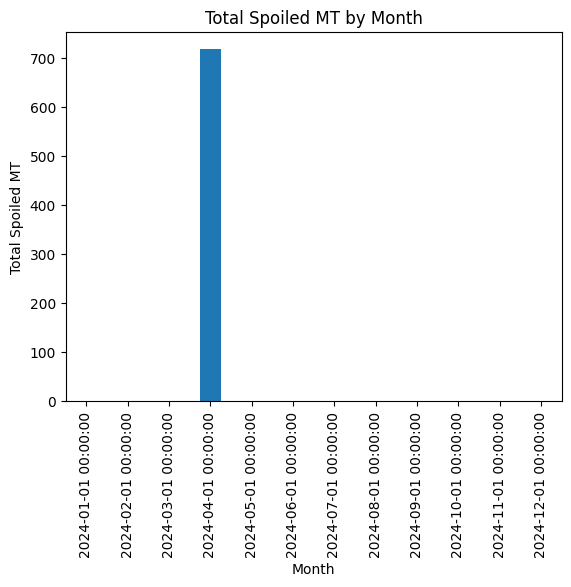

In [61]:
import pandas as pd
import pulp
import calendar

# ——— 0. LOAD & FORMAT YOUR DATA ———
# inventory_aggregated_china: UNRESTRICTED_STOCK (fresh init), INITIAL_DEGRADED_STOCK (scrap init), SHELF_LIFE_IN_MONTH,
#   DOWNGRADE_VALUE_LOST_PERCENT, TRANSPORTATION_MODES, Value_USD_per_MT
# inb_2024_china: month (Period), MATERIAL_NAME, MonthlyInbound_MT
# forecast_ch: Month (Period), Total_Cap_MT, Predicted_Outbound_MT, Predicted_Inventory_MT
# operations_df: Plant/Mode of Transport, Cost_USD

# normalize to Period dtype
if not pd.api.types.is_period_dtype(inb_2024_china['month']):
    inb_2024_china['month'] = pd.to_datetime(inb_2024_china['month']).dt.to_period('M')
if not pd.api.types.is_period_dtype(forecast_ch['Month']):
    forecast_ch['Month'] = pd.to_datetime(forecast_ch['Month']).dt.to_period('M')

# ——— 1. PARAMS & LOOKUPS ———
ops           = operations_china.set_index('Plant/Mode of Transport')['Cost_USD'].to_dict()
h_daily       = ops.get('CHINA WAREHOUSE', 0)

months        = sorted(forecast_ch['Month'])
days_in_month = {m: calendar.monthrange(m.year, m.month)[1] for m in months}
M             = inventory_aggregated_china['MATERIAL_NAME'].tolist()

# initial stocks
inv_fresh_init = inventory_aggregated_china.set_index('MATERIAL_NAME')['UNRESTRICTED_STOCK'].to_dict()
inv_deg_init   = inventory_aggregated_china.set_index('MATERIAL_NAME')['UNRESTRICTED_STOCK'].to_dict()

# other SKU attrs
shelf_life = inventory_aggregated_china.set_index('MATERIAL_NAME')['SHELF_LIFE_IN_MONTH'].astype(int).to_dict()
spoil_pct  = (inventory_aggregated_china.set_index('MATERIAL_NAME')['DOWNGRADE_VALUE_LOST_PERCENT']/100).to_dict()
value_usd  = inventory_aggregated_china.set_index('MATERIAL_NAME')['Value_USD_per_MT'].to_dict()

# volumes & capacities
demand        = forecast_ch.set_index('Month')['Predicted_Outbound_MT'].to_dict()
capacity_hard = forecast_ch.set_index('Month')['Total_Cap_MT'].to_dict()
capacity_soft = forecast_ch.set_index('Month')['Predicted_Inventory_MT'].to_dict()
inb_lkup      = inb_2024_china.set_index(['month','MATERIAL_NAME'])['MonthlyInbound_MT'].to_dict()



# relaxation parameters
cap_hard_factor = 2.8   # allow up to 120% of hard capacity
lower_factor    = 0.30   # enforce at least 30% of soft target
upper_factor    = 2.8   # enforce at most 150% of soft target

# ——— 2. BUILD LP ———
prob = pulp.LpProblem("No_Slack_Model", pulp.LpMinimize)

# decision vars
Yf = {(m,t): pulp.LpVariable(f"ShipF_{m}_{t}", lowBound=0) for m in M for t in months}
Yd = {(m,t): pulp.LpVariable(f"ShipD_{m}_{t}", lowBound=0) for m in M for t in months}
If = {(m,t): pulp.LpVariable(f"InvF_{m}_{t}",  lowBound=0) for m in M for t in months}
Id = {(m,t): pulp.LpVariable(f"InvD_{m}_{t}",  lowBound=0) for m in M for t in months}
Z  = {(m,t): pulp.LpVariable(f"Deg_{m}_{t}",   lowBound=0) for m in M for t in months}

# ——— 3. INVENTORY BALANCE & “ANY‐TIME” SPOILAGE ———
for m in M:
    for i, t in enumerate(months):
        prev_f = inv_fresh_init.get(m, 0) if i == 0 else If[m, months[i-1]]
        prev_d = inv_deg_init.get(m,   0) if i == 0 else Id[m, months[i-1]]
        inb    = inb_lkup.get((t,m), 0.0)

        # balance equations
        prob += prev_f + inb - Yf[m,t] - Z[m,t] == If[m,t]
        prob += prev_d + Z[m,t] - Yd[m,t] == Id[m,t]

        # allow spoilage up to available fresh
        prob += Z[m,t] <= prev_f

# ——— 4. DEMAND & CAPACITY (ALL HARD) ———
for t in months:
    ship   = pulp.lpSum(Yf[m,t] + Yd[m,t] for m in M)
    inv_tot= pulp.lpSum(If[m,t] + Id[m,t] for m in M)

    # cannot exceed demand
    prob += ship <= demand[t]

    # hard capacity
    prob += inv_tot <= cap_hard_factor * capacity_hard[t]

    # soft‐inventory floor and ceiling as hard bounds
    prob += inv_tot >= lower_factor * capacity_soft[t]
    prob += inv_tot <= upper_factor * capacity_soft[t]

# ——— 5. OBJECTIVE ———
prob += (
    # holding cost
    pulp.lpSum((If[m,t] + Id[m,t]) * h_daily * days_in_month[t]
               for m in M for t in months)
    # spoilage cost
  + pulp.lpSum(Z[m,t] * spoil_pct[m] * value_usd[m]
               for m in M for t in months)
), "Total_Cost"

# ——— 6. SOLVE & REPORT ———
prob.solve(pulp.PULP_CBC_CMD(msg=False))
print("Status:", pulp.LpStatus[prob.status])
print("Total cost:", pulp.value(prob.objective))

# monthly summary
rows = []
for t in months:
    rows.append({
        'Month':      t.to_timestamp(),
        'ShipOut_MT': sum(Yf[m,t].value()+Yd[m,t].value() for m in M),
        'EndInvF_MT': sum(If[m,t].value() for m in M),
        'EndInvD_MT': sum(Id[m,t].value() for m in M),
        'Spoiled_MT': sum(Z[m,t].value() for m in M),
    })
print(pd.DataFrame(rows))

# # can you get the spoiled MT by SKU and month?
rows = []
for m in M:
    for t in months:
        rows.append({
            'Month':        t.to_timestamp(),
            'Material':     m,
            'ShipFresh_MT': Yf[m,t].value(),
            'ShipDegraded_MT': Yd[m,t].value(),
            'Total_Ship_MT': Yf[m,t].value() + Yd[m,t].value(),
            'Spoiled_MT':   Z[m,t].value()
        })
ship_by_sku = pd.DataFrame(rows)
print(ship_by_sku)
# can we plot the spoiled_mt by month?
import matplotlib.pyplot as plt
monthly_totals = ship_by_sku.groupby('Month')['Spoiled_MT'].sum()
monthly_totals.plot(kind='bar')
plt.title('Total Spoiled MT by Month')
plt.xlabel('Month')
plt.ylabel('Total Spoiled MT')
plt.show()



In [ ]:

inventory_scrap_china_usd = inventory_scrap_china_usd.groupby(['BALANCE_AS_OF_DATE']).agg(
    {'UNRESTRICTED_STOCK': 'sum'}
).reset_index()


INVE

,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER,UNRESTRICTED_STOCK,STOCK_UNIT,STOCK_SELL_USD
0,2023-12-31,CHINA-WAREHOUSE,MAT-0045,SCRAP,164,KG,29.54
1,2023-12-31,CHINA-WAREHOUSE,MAT-0311,SCRAP,4142,KG,3502.52
2,2023-12-31,CHINA-WAREHOUSE,MAT-0194,SCRAP,100,KG,43.96
3,2023-12-31,CHINA-WAREHOUSE,MAT-0257,SCRAP,5151,KG,1463.98
4,2023-12-31,CHINA-WAREHOUSE,MAT-0258,SCRAP,10048,KG,8243.06
5,2023-12-31,CHINA-WAREHOUSE,MAT-0100,SCRAP,4599,KG,3889.06
6,2023-12-31,CHINA-WAREHOUSE,MAT-0095,SCRAP,1631,KG,315.14
7,2023-12-31,CHINA-WAREHOUSE,MAT-0095,SCRAP,25,KG,4.90
8,2023-12-31,CHINA-WAREHOUSE,MAT-0141,SCRAP,8298,KG,4344.62
9,2023-12-31,CHINA-WAREHOUSE,MAT-0199,SCRAP,5999,KG,12051.20


In [56]:
import pandas as pd
import pulp
import calendar

# ——— 0. LOAD & FORMAT YOUR DATA ———
# inventory_aggregated: has UNRESTRICTED_STOCK, SHELF_LIFE_IN_MONTH,
#   DOWNGRADE_VALUE_LOST_PERCENT, TRANSPORTATION_MODES, Value_USD_per_MT
# inb_2024: month (Period), MATERIAL_NAME, MonthlyInbound_MT
# forecast_sg: Month (Period), Total_Cap_MT, Predicted_Outbound_MT, Predicted_Inventory_MT
# operations_df: Plant/Mode of Transport, Cost_USD

# normalize to Period dtype
if not pd.api.types.is_period_dtype(inb_2024['month']):
    inb_2024['month'] = pd.to_datetime(inb_2024['month']).dt.to_period('M')
if not pd.api.types.is_period_dtype(forecast_sg['Month']):
    forecast_sg['Month'] = pd.to_datetime(forecast_sg['Month']).dt.to_period('M')

# ——— 1. PARAMS & LOOKUPS ———

# holding cost per MT per day
ops     = operations_sg.set_index('Plant/Mode of Transport')['Cost_USD'].to_dict()
h_daily = ops.get('SINGAPORE WAREHOUSE', 0)

# timeline & SKUs
months        = sorted(forecast_sg['Month'])
days_in_month = {m: calendar.monthrange(m.year, m.month)[1] for m in months}
M             = inventory_aggregated['MATERIAL_NAME'].tolist()

# SKU attributes
inv_deg_init = { m: 0 for m in M }
inv_fresh_init     = inventory_aggregated.set_index('MATERIAL_NAME')['UNRESTRICTED_STOCK'].to_dict()
shelf_life   = inventory_aggregated.set_index('MATERIAL_NAME')['SHELF_LIFE_IN_MONTH'].astype(int).to_dict()
spoil_pct    = (inventory_aggregated.set_index('MATERIAL_NAME')['DOWNGRADE_VALUE_LOST_PERCENT']/100).to_dict()
mode_allowed = inventory_aggregated.set_index('MATERIAL_NAME')['TRANSPORTATION_MODES'].to_dict()
value_usd    = inventory_aggregated.set_index('MATERIAL_NAME')['Value_USD_per_MT'].to_dict()

# volume lookups
demand        = forecast_sg.set_index('Month')['Predicted_Outbound_MT'].to_dict()
capacity_hard = forecast_sg.set_index('Month')['Total_Cap_MT'].to_dict()
capacity_soft = forecast_sg.set_index('Month')['Predicted_Inventory_MT'].to_dict()
inb_lkup      = inb_2024.set_index(['month','MATERIAL_NAME'])['MonthlyInbound_MT'].to_dict()

# relaxation parameters
cap_hard_factor = 1   # allow up to 120% of hard capacity
lower_factor    = 0.75   # enforce at least 30% of soft target
upper_factor    = 1.1   # enforce at most 150% of soft target

# ——— 2. BUILD LP ———
prob = pulp.LpProblem("No_Slack_Model", pulp.LpMinimize)

# decision vars
Yf = {(m,t): pulp.LpVariable(f"ShipF_{m}_{t}", lowBound=0) for m in M for t in months}
Yd = {(m,t): pulp.LpVariable(f"ShipD_{m}_{t}", lowBound=0) for m in M for t in months}
If = {(m,t): pulp.LpVariable(f"InvF_{m}_{t}",  lowBound=0) for m in M for t in months}
Id = {(m,t): pulp.LpVariable(f"InvD_{m}_{t}",  lowBound=0) for m in M for t in months}
Z  = {(m,t): pulp.LpVariable(f"Deg_{m}_{t}",   lowBound=0) for m in M for t in months}

# ——— 3. INVENTORY BALANCE & “ANY‐TIME” SPOILAGE ———
for m in M:
    for i, t in enumerate(months):
        prev_f = inv_fresh_init.get(m, 0) if i == 0 else If[m, months[i-1]]
        prev_d = inv_deg_init.get(m,   0) if i == 0 else Id[m, months[i-1]]
        inb    = inb_lkup.get((t,m), 0.0)

        # balance equations
        prob += prev_f + inb - Yf[m,t] - Z[m,t] == If[m,t]
        prob += prev_d + Z[m,t] - Yd[m,t] == Id[m,t]

        # allow spoilage up to available fresh
        prob += Z[m,t] <= prev_f

# ——— 4. DEMAND & CAPACITY (ALL HARD) ———
for t in months:
    ship   = pulp.lpSum(Yf[m,t] + Yd[m,t] for m in M)
    inv_tot= pulp.lpSum(If[m,t] + Id[m,t] for m in M)

    # cannot exceed demand
    prob += ship <= demand[t]

    # hard capacity
    prob += inv_tot <= cap_hard_factor * capacity_hard[t]

    # soft‐inventory floor and ceiling as hard bounds
    prob += inv_tot >= lower_factor * capacity_soft[t]
    prob += inv_tot <= upper_factor * capacity_soft[t]

# ——— 5. OBJECTIVE ———
prob += (
    # holding cost
    pulp.lpSum((If[m,t] + Id[m,t]) * h_daily * days_in_month[t]
               for m in M for t in months)
    # spoilage cost
  + pulp.lpSum(Z[m,t] * spoil_pct[m] * value_usd[m]
               for m in M for t in months)
), "Total_Cost"

# ——— 6. SOLVE & REPORT ———
prob.solve(pulp.PULP_CBC_CMD(msg=False))
print("Status:", pulp.LpStatus[prob.status])
print("Total cost:", pulp.value(prob.objective))

# monthly summary
rows = []
for t in months:
    rows.append({
        'Month':      t.to_timestamp(),
        'ShipOut_MT': sum(Yf[m,t].value()+Yd[m,t].value() for m in M),
        'EndInvF_MT': sum(If[m,t].value() for m in M),
        'EndInvD_MT': sum(Id[m,t].value() for m in M),
        'Spoiled_MT': sum(Z[m,t].value() for m in M),
    })
print(pd.DataFrame(rows))

# can you get the spoiled MT by SKU and month?
rows = []
for m in M:
    for t in months:
        rows.append({
            'Month':        t.to_timestamp(),
            'Material':     m,
            'ShipFresh_MT': Yf[m,t].value(),
            'ShipDegraded_MT': Yd[m,t].value(),
            'Total_Ship_MT': Yf[m,t].value() + Yd[m,t].value(),
            'Spoiled_MT':   Z[m,t].value()
        })
ship_by_sku = pd.DataFrame(rows)


/var/folders/2w/jclxd5hs42lfw00_1g7r52hr0000gn/T/ipykernel_68739/681398378.py:13: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if not pd.api.types.is_period_dtype(inb_2024['month']):
/var/folders/2w/jclxd5hs42lfw00_1g7r52hr0000gn/T/ipykernel_68739/681398378.py:15: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if not pd.api.types.is_period_dtype(forecast_sg['Month']):


Status: Optimal
Total cost: 121980194.00370012
        Month  ShipOut_MT  EndInvF_MT  EndInvD_MT  Spoiled_MT
0  2024-01-01    8710.000   30033.300         0.0         0.0
1  2024-02-01    8217.748   27572.250         0.0         0.0
2  2024-03-01    9360.000   31361.451         0.0         0.0
3  2024-04-01    7520.000   33574.576         0.0         0.0
4  2024-05-01   10740.000   31055.826         0.0         0.0
5  2024-06-01    4513.576   30375.000         0.0         0.0
6  2024-07-01    3516.250   33216.000         0.0         0.0
7  2024-08-01   11330.000   33380.750         0.0         0.0
8  2024-09-01    6024.500   31301.250         0.0         0.0
9  2024-10-01    3773.250   31386.750         0.0         0.0
10 2024-11-01    3110.250   30245.250         0.0         0.0
11 2024-12-01   13970.000   16815.250         0.0         0.0


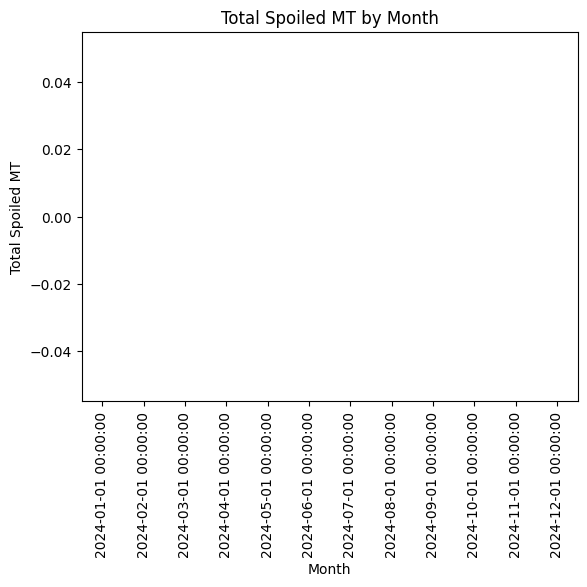

Cost reduction: 26.96%


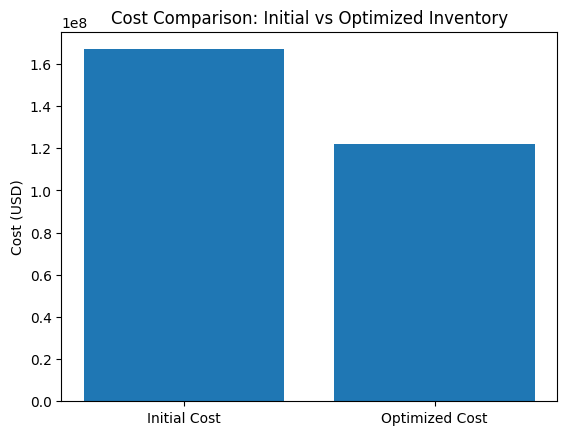

In [53]:
# plot the total cost of optimized inventory with the initial inventory cost = 167000000 can you plot bar chart
initial_cost = 167000000
optimized_cost = pulp.value(prob.objective)
cost_reduction = (initial_cost - optimized_cost) / initial_cost
print(f"Cost reduction: {cost_reduction:.2%}")
import matplotlib.pyplot as plt
costs = [initial_cost, optimized_cost]
labels = ['Initial Cost', 'Optimized Cost']
plt.bar(labels, costs)
plt.ylabel('Cost (USD)')
plt.title('Cost Comparison: Initial vs Optimized Inventory')
plt.show()

In [66]:
inb_2024

,month,MATERIAL_NAME,MonthlyInbound_MT,SHELF_LIFE_IN_MONTH,DOWNGRADE_VALUE_LOST_PERCENT,TRANSPORTATION_MODES,Value_USD_per_MT
0,2024-01,MAT-0037,24.75,3,15,TRUCK,504.436510
1,2024-01,MAT-0056,618.75,3,5,TRUCK,753.637567
2,2024-01,MAT-0065,123.75,4,25,TRUCK,645.703293
3,2024-01,MAT-0068,123.75,6,20,TRUCK,405.684993
4,2024-01,MAT-0089,24.75,4,5,TRUCK,559.500875
...,...,...,...,...,...,...,...
376,2024-11,MAT-0390,445.50,7,30,TRUCK,589.193283
377,2024-11,MAT-0413,148.50,7,20,TRUCK,714.847270
378,2024-12,MAT-0247,247.50,6,20,TRUCK,627.720466
379,2024-12,MAT-0302,247.50,4,20,TRUCK,639.787207
